In [ ]:
# %pip install torch
# %pip install CUDA
# %pip install scanpy==1.8.1
# %pip install rpy2
# %pip install torchvision
# %pip install opencv-python
# %pip install torchtoolbox
# %pip install pandas

In [112]:
import pandas as pd
import os
from ConGI.utils import load_ST_file
path = 'D:\\Genomics\\A2\\dataset-1\\SpatialLIBID\\'
def form_meta(name, path='barcode_level_layer_map.tsv'):
    file_path = os.path.join(os.path.dirname(path), 'metadata.tsv')
    df = pd.read_csv(path, delimiter='\t')
    print(df.head())
    data = {
    'barcodes': [],
    'layer_guess': []
    }
    for i in range(len(df['AAACAACGAATAGTTC-1'])):
        if df['151507'][i] == int(name):
            data['barcodes'].append(df['AAACAACGAATAGTTC-1'][i])
            data['layer_guess'].append(df['L1'][i])
    
    df = pd.DataFrame(data)
    print(df.head())
    print(df.shape)
    df.to_csv(os.path.join(path,name,'metadata.tsv'), sep='\t', index=True)

def adjust_meta():
    df_meta = pd.read_csv('D:\\Genomics\\A2\\dataset-1\\SpatialLIBID\\151507\\metadata.tsv', delimiter='\t')
    path = 'D:\Genomics\A2\dataset-1\SpatialLIBID'
    name = '151507'
    adata = load_ST_file(os.path.join(path, name))
    data = {
    'barcodes': [],
    'layer_guess': []
    }

    barcodelist = df_meta['barcodes'].values.tolist()
    layerlist = df_meta['layer_guess'].values.tolist()

    for barcode in adata.obs.index:
        try:
            index = barcodelist.index(str(barcode))
            data['barcodes'].append(barcodelist[index])
            data['layer_guess'].append(layerlist[index])
        except:
            data['barcodes'].append(str(barcode))
            data['layer_guess'].append(str(-1))
    df = pd.DataFrame(data)
    df.to_csv('D:\\Genomics\\A2\\dataset-1\\SpatialLIBID\\151507\\metadata.tsv', sep='\t', index=False)


form_meta(name = '151507')
adjust_meta()


   AAACAACGAATAGTTC-1  151507  L1
0  AAACAAGTATCTCCCA-1  151507  L3
1  AAACAATCTACTAGCA-1  151507  L1
2  AAACACCAATAACTGC-1  151507  WM
3  AAACAGCTTTCAGAAG-1  151507  L6
4  AAACAGGGTCTATATT-1  151507  L6
             barcodes layer_guess
0  AAACAAGTATCTCCCA-1          L3
1  AAACAATCTACTAGCA-1          L1
2  AAACACCAATAACTGC-1          WM
3  AAACAGCTTTCAGAAG-1          L6
4  AAACAGGGTCTATATT-1          L6
(4220, 2)


d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# from ConGI.utils import load_ST_file
# path = 'D:\Genomics\A2\dataset-1\SpatialLIBID'
# name = '151507'
# adata = load_ST_file(os.path.join(path, name))
# df_meta = pd.read_csv(os.path.join(path, name, 'metadata.tsv'), sep='\t')
# label = pd.Categorical(df_meta['layer_guess']).codes

# data = {
#     'barcodes': [],
#     'layer_guess': []
#     }

# barcodelist = df_meta['barcodes'].values.tolist()
# layerlist = df_meta['layer_guess'].values.tolist()

# for barcode in adata.obs.index:
#     try:
#         index = barcodelist.index(str(barcode))
#         data['barcodes'].append(barcodelist[index])
#         data['layer_guess'].append(layerlist[index])
#     except:
#         data['barcodes'].append(str(barcode))
#         data['layer_guess'].append(str(-1))
# print(data.keys())
# print(data['barcodes'])
# print(data['layer_guess'])
# print(barcodelist)
# print(layerlist)

In [119]:
import numpy as np

def pad_image(image_matrix):
    # Get the dimensions of the original image matrix
    height, width = image_matrix.shape

    # Determine the desired dimensions for the padded image
    padded_height = height + 2  # Add 2 rows of zeros (one at the top and one at the bottom)
    padded_width = width + 2    # Add 2 columns of zeros (one on the left and one on the right)

    # Create a new matrix filled with zeros with the desired dimensions
    padded_image = np.zeros((padded_height, padded_width), dtype=image_matrix.dtype)

    # Copy the original image into the center of the padded matrix
    padded_image[1:-1, 1:-1] = image_matrix

    return padded_image

# Example usage:
original_image = np.array([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]])

padded_image = pad_image(original_image)
print(padded_image)

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


In [161]:
from ConGI.dataset import Dataset
# dataset = Dataset.__init__(dataset = "SpatialLIBD", path = 'D:\Genomics\A2\dataset-1\SpatialLIBID', name = '151507')
dataset = Dataset(dataset='SpatialLIBD', path='D:\Genomics\A2\dataset-1\SpatialLIBID', name='151507')
print(dataset)

d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Genomics\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [128]:
print(adata)
print(adata.obs)
print(adata.obsm['spatial'])

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
                    in_tissue  array_row  array_col
AAACAACGAATAGTTC-1          1          0         16
AAACAAGTATCTCCCA-1          1         50        102
AAACAATCTACTAGCA-1          1          3         43
AAACACCAATAACTGC-1          1         59         19
AAACAGCTTTCAGAAG-1          1         43          9
...                       ...        ...        ...
TTGTTGTGTGTCAAGA-1          1         31         77
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27
TTGTTTGTGTAAATTC-1          1          7         51

[4226 rows x 3 columns]
[[3276 2514]
 [9178 8520]
 [5133 2878]
 ...
 [4218 9703]
 [4017 7906]
 [5683 3359]]


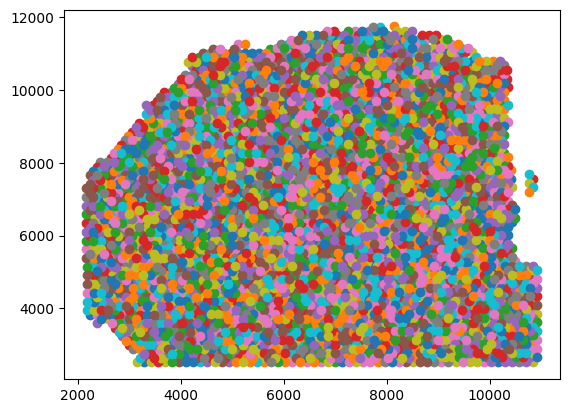

In [132]:
import matplotlib.pyplot as plt
for x,y in adata.obsm['spatial']:
    plot = plt.scatter(x,y)

In [139]:
#what can i access from dataset
print(dataset.__dict__.keys())

AttributeError: 'NoneType' object has no attribute '__dict__'